In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris



In [10]:
# 10-fold cross validation with knn-5 (n_neighbours parameter)
knn= KNeighborsClassifier(n_neighbors=5)

# load the datasets

iris= load_iris()
type(iris)

sklearn.utils.Bunch

In [17]:
# preparing the data by spliting feature datasets & target sets


print(iris.feature_names)
print(iris.target_names)

X=iris.data
y=iris.target
print(X.shape)
print(y.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)


In [13]:
scores= cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)


[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [5]:
# use average accuracy

print(scores.mean())

0.9666666666666668


In [6]:
# search the optimal value for K
k_range= list(range(1,31))
k_score=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X, y, cv=10,scoring='accuracy')
    k_score.append(scores.mean())  

    
print(k_score)


[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [7]:
# count of observation recived
len(k_score)

30

Text(0, 0.5, 'Cross-validated accuracy')

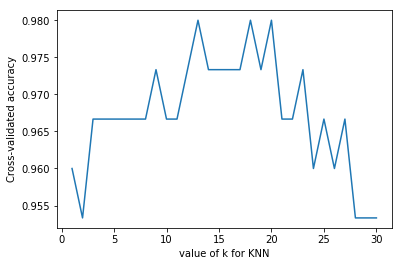

In [8]:
# visualize accuarcy against diffrent values for k

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range,k_score)
plt.xlabel('value of k for KNN')
plt.ylabel('Cross-validated accuracy')

GOAL : compare KNN cross validation fuction with Logistic regression

In [31]:
# 10 fold cross validation function with the best KNN model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn= KNeighborsClassifier(n_neighbors=20)
score= cross_val_score(knn,X,y,cv=10,scoring='accuracy')

print(score.mean())

0.9800000000000001


In [28]:
# 10 fold cross valdation function with logistic regression
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
Score_lr=cross_val_score(lr,X,y,cv=10,scoring='accuracy')
print(Score_lr.mean())


0.9533333333333334


C:\Users\Tamal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tamal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Tamal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tamal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Tamal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

In [ ]:
Cross-validation example: feature selection

In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
lm= LinearRegression()

data= pd.read_csv ('Advertising.csv',index_col=0)
data.head(3)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [52]:
# prpare the data in feature matrix and target vector

X = data[['TV','Radio','Newspaper']]
# select Sales column as y variable
y=data.Sales

In [57]:
# 10 fold cross validation with all features

score_lm= cross_val_score(lm,X,y,cv=10,scoring='neg_mean_squared_error')
# print error rate for 10 various fold, as an array 
score_lm

array([-3.56038438, -3.29767522, -2.08943356, -2.82474283, -1.3027754 ,
       -1.74163618, -8.17338214, -2.11409746, -3.04273109, -2.45281793])

In [60]:
# fix the sign of MSE scores

mse= -score_lm
print(mse)


[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [62]:
# convert mse to RMSE
rmse_score= np.sqrt(mse)
print(rmse_score)


[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [63]:
# calculate the average RMSE
print(rmse_score.mean())


1.6913531708051797


In [ ]:
# 10 fold cross validation with two features ['TV','Radio']

In [65]:
X=data[['TV','Radio']]

print(np.sqrt(-cross_val_score(lm, X,y,cv=10,scoring='neg_mean_squared_error')).mean())


1.6796748419090766
